# Tutorial 4 - Logistic Regression (Binary classification)

## Binary classification

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv("4-insurance-data.csv")
df1.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


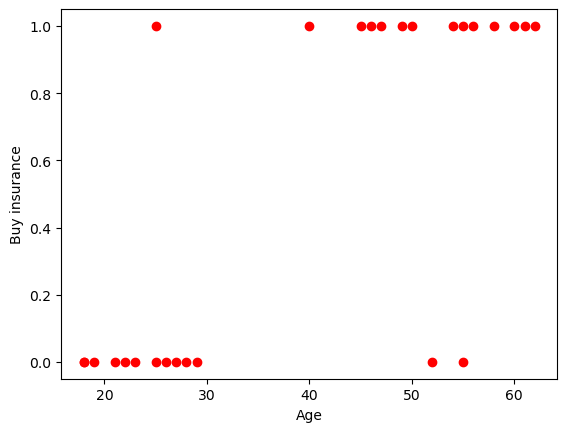

In [14]:
%matplotlib inline
plt.xlabel("Age")
plt.ylabel("Buy insurance")
plt.scatter(df1.age, df1.bought_insurance, color='r', marker='o')
plt.show()

### 1.1 Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [29]:
model1 = LinearRegression()
model1.fit(df1[["age"]], df1.bought_insurance)
print(model1.score(df1[["age"]], df1.bought_insurance))
print(model1.coef_, model1.intercept_)

0.5364021643885126


In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1[["age"]], df1.bought_insurance, test_size=0.3, random_state=10)

In [48]:
model2 = LinearRegression()
model2.fit(x_train, y_train)
print(model2.score(x_train, y_train))
print(model2.score(x_test, y_test))
print(model2.coef_, model2.intercept_)

0.3887359386094952
0.7666318937690247
[0.01968283] -0.2459731167391277


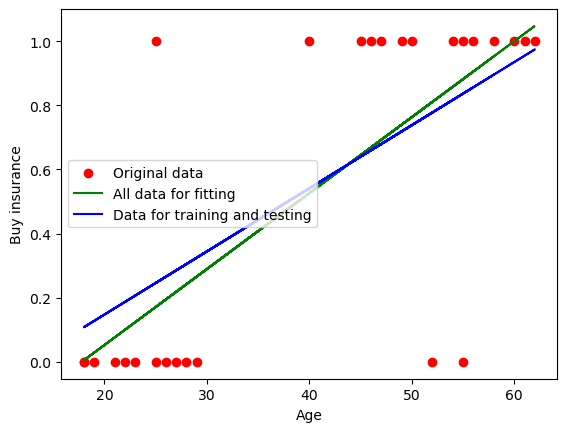

In [49]:
%matplotlib inline
plt.xlabel("Age")
plt.ylabel("Buy insurance")
plt.scatter(df1.age, df1.bought_insurance, color='r', marker='o', label="Original data")

all_data_4_fitting = model1.coef_*df1.age + model1.intercept_
plt.plot(df1.age, all_data_4_fitting, color='g', label="All data for fitting")

data_4_train_test = model2.coef_ * df1.age + model2.intercept_
plt.plot(df1.age, data_4_train_test, color='b', label="Data for training and testing")

plt.legend(loc="center left")
plt.show()

### 1.2 Logistic Regression

In [59]:
model3 = LogisticRegression()
model3.fit(df1[["age"]], df1.bought_insurance)
print(model3.score(df1[["age"]], df1.bought_insurance))
print(model3.coef_, model3.intercept_)

0.8888888888888888
[[0.1354656]] [-5.26279696]


In [60]:
model4 = LogisticRegression()
model4.fit(x_train, y_train)
print(model4.score(x_train, y_train))
print(model4.score(x_test, y_test))
print(model4.coef_, model4.intercept_)

0.8333333333333334
1.0
[[0.0992946]] [-3.74830775]


In [73]:
print(x_test, '\n\n', y_test)

    age
7    60
5    56
18   19
21   26
11   28
1    25
2    47
12   27
24   50 

 7     1
5     1
18    0
21    0
11    0
1     0
2     1
12    0
24    1
Name: bought_insurance, dtype: int64


In [96]:
test = model4.predict_proba(df1[["age"]])[:, 1] # 1st for not buy and 2nd for buy
test

array([0.17309826, 0.21995259, 0.71474424, 0.80455521, 0.69407584,
       0.85962635, 0.84721146, 0.90108765, 0.91743211, 0.90959197,
       0.12335834, 0.27526758, 0.25590671, 0.2955115 , 0.75345557,
       0.84721146, 0.21995259, 0.88192419, 0.13450383, 0.12335834,
       0.15934347, 0.2374614 , 0.55563774, 0.67259588, 0.77143335,
       0.83391072, 0.18777517])

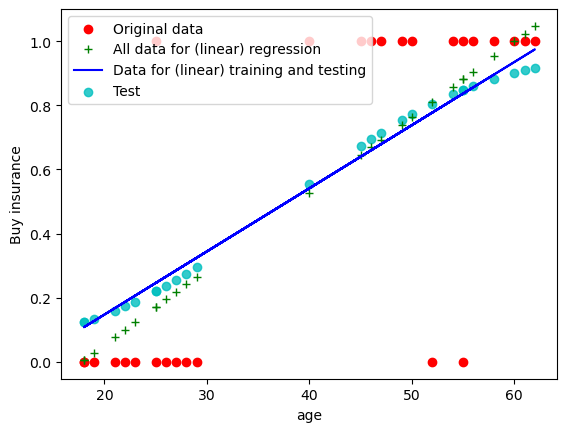

In [97]:
%matplotlib inline
plt.xlabel("Age")
plt.ylabel("Buy insurance")
plt.scatter(df1.age, df1.bought_insurance, color='r', marker='o', label="Original data")

# linear regression
all_data_4_linear_fitting = model1.coef_ * df1.age + model1.intercept_
plt.plot(df1.age, all_data_4_linear_fitting, 'g+', label="All data for (linear) regression")

data_4_linear_train_test = model2.coef_ * df1.age + model2.intercept_
plt.plot(df1.age, data_4_linear_train_test, 'b-', label="Data for (linear) training and testing")

# logistic regression
all_data_4_logistic_fitting = model3.coef_[0] * df1.age + model3.intercept_
sns.regplot(x=df1.age, y=test, logistic=True, ci=None,
           color='c', label="Test")

#  color='c', label="All data for (logistic) fitting"

#data_4_logistic_train_test = model4.coef_[0] * df1.age + model4.intercept_
#plt.plot(df1.age, data_4_logistic_train_test, 'm-.', label="Data for (logistic) training and testing")

plt.legend(loc="upper left")
plt.show()

### How to plot the logistic regression data?

## Multiclass classification

In [98]:
# vote for parties
# identify hand written digits recognition

In [99]:
from sklearn.datasets import load_digits

In [100]:
digits = load_digits()

In [101]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [103]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

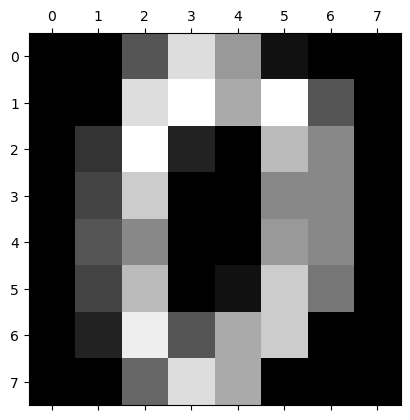

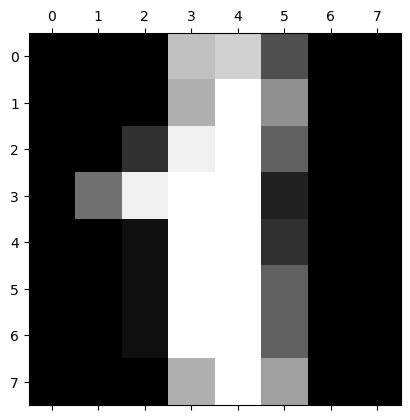

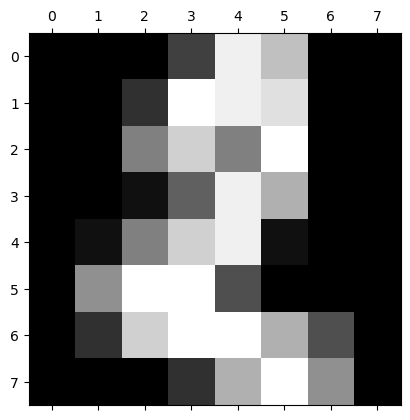

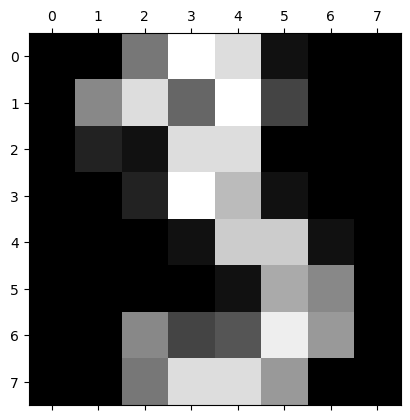

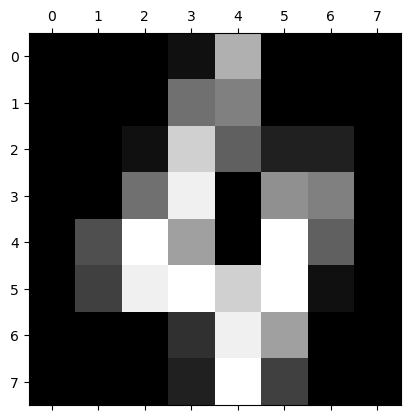

In [110]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [111]:
digits.target[0:5]

array([0, 1, 2, 3, 4])